In [1]:
# knižnice
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import pandas as pd

In [11]:
# definovanie pola -> dôvod pochopíme a vysvetlíme v ďalších krokoch
data = {'Vaha0':[], 'Vaha1': [], 'Vaha2': [], 'Chyba': []}
df_vahy = pd.DataFrame(data)

In [2]:

# Adaline bol vytvorený niekolko rokov neskôr po Perceptrone. 
# Na rozdiel od Perceptronu aktualizuje váhu na základe lineárnej aktivácie.
class AdalineGD(object):
    
    # v metóde definujeme rýhlosť učenia pre vstup a zároveň počet opakovaní kolko krát sa má cyklus vykonať, kedže je potrebné
    # niekoľko krát opakovať proces, kvôli dokonalejším výsledkom
    def __init__(self, rychlost_ucenia=0.01,pocet_iteracii = 50):

        self.rychlost_ucenia = rychlost_ucenia
        self.pocet_iteracii = pocet_iteracii
        
    # metóda fit znamená takzvané učenie sa, alebo proces učenia
    # jej argumenty tvorí X, ktorý predtsavuje vstup pre trénovanie(matica), z datasetu, ktorý dalej loadujeme berie stľpce, ktoré mu nadefinujeme
    # ďalší argument je y, ten predstavuje výsledky ako pole, ktoré očakávame
    def fit(self,X,y):
        
        #váhy na začiatku nastavíme na nulu a nastavíme si šírku pola váh
        
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_=[]
        
        self.vahy_visu0 = []
        self.vahy_visu1 = []
        self.vahy_visu2 = []
        
# proces učenia sa definovaný na základe matematických vzorcov pre vstupy, výstupy, chyby a váhy
# v podstate všetko potrebné pre to aby sme prišli k hodnotám pri akých je dobrá miera učenia sa pre optimálnu konvergenciu
# aktualizácia váh je počítaná na základe všetkých vzoriek a nie ako pri Perceptrone postupne po každej vzorke
        for i in range (self.pocet_iteracii):
            output = self.net_input(X)       
            errors = (y-output)
            self.w_[1:] += self.rychlost_ucenia * X.T.dot(errors)
            self.w_[0] += self.rychlost_ucenia * errors.sum()
            cost = (errors ** 2).sum()/2.0
            self.cost_.append(cost)
            
            # načítanie váh do premenných neskôr pre vizualizáciu
            self.vahy_visu0.append(self.w_[0])
            self.vahy_visu1.append(self.w_[1])
            self.vahy_visu2.append(self.w_[2])
            
        # naplnanie riadkov datasetu po každej iterácii    
        df_vahy['Vaha0'] = self.vahy_visu0
        df_vahy['Vaha1'] = self.vahy_visu1
        df_vahy['Vaha2'] = self.vahy_visu2
        df_vahy['Chyba'] = self.cost_
        return self
    # vstup
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    # lineárna aktivácia pomocou ktorej aktualizujeme váhu
    def linearna_aktivacia(self,X):
        return self.net_input(X)
    
    # predpoklad
    def predikcia(self,X):
        return np.where(self.linearna_aktivacia(X)>=0.0,1,-1)

In [ ]:
# načítanie súboru, je to vlastne náš dataset, s ktorým budeme pracovať

df = pd.read_csv('heart-head.csv', header = None)

In [ ]:
# do každej premennej si načítame nami požadované dáta z datasetu(vstup), určujeme aj stlpec z matice, ktorý požadujeme. V tomto prípade do X je to 1. a 3. stlpec
# pre y môžeme vidieť tiež vybrané hodnoty, akúrát v ďalšom kroku ich ešte priamo vymedzíme podmienkou a následne vypíšeme
# preprocessing.scale vstupnej matice je jej štandartizácia

povodnaMatica_X = df.iloc[0:303,[0,13]].values
X = preprocessing.scale(povodnaMatica_X)
y = df.iloc[0:303, 13].values

print(y)

In [ ]:
print(X)

In [ ]:
# do premennej načítame celú triedu Adaline, a nastavíme si rýchlosť učenia a počet opakovaní
# Keďže vyššie v programe máme celú Adaline triedu aj s metódami zadefinovanú, následne sme si načítali vstupný súbor a načítali potrebné dáta do premenných
# v dalších krokoch môžeme už využívať zadefinované metódy

moj_adaline = AdalineGD(rychlost_ucenia=0.01,pocet_iteracii = 50)

In [ ]:
# aplikovali sme proces učenia a zobrazíme si ako je naplnené X vstupom na trénovanie
moj_adaline.fit(X,y)


In [ ]:
# zobrazenie váh po každej iterácií + prislúchajúca chyba
df_vahy

In [ ]:
# zobrazenie finálnych váh po procese
moj_adaline.w_

In [ ]:
# vizualzácia nami zvolených údajov z datasetu, podľa podmienky kde sa v datasete nachádzajú tie, ktoré sme si my zvolili
plt.scatter(X[0:50,0],X[0:50,1], marker='o', label='kosatec_sibirsky')
plt.scatter(X[50:100,0],X[50:100,1], marker='x', label='kosatec_roznofarebny')

plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()

In [ ]:
# vykreslenie chyby po celom procese
# na danom grafe môžeme vidieť, že v tomto prípade sme v prijatelných hodnotách a máme správne nastavené hodnoty pre učenie a počet iterácií
# svoju úlohu taktiež zohralo aj škálovanie funkcií a to konkrétne štandartizácia
# pri použití iných hodnôt pre učenie a iný počet iterácií, môže nastať situácia kedy by sme dané hodnoty neodhadli a bez využitia štandartizácie
# by tieto hodnoty na grafe z ľava do pravo klesali a nachádzali by sa v minimách...
# v našom prípade môžeme vidieť celkom dobré výsledky, tie odhadujeme na základe stabilizovania sa grafu pri minimálnej chybe

plt.plot(moj_adaline.cost_, label = 'chyba')
plt.legend()

In [ ]:
# vyualizácia výsledných váh 

plt.plot(moj_adaline.vahy_visu0, label = '1. váha')
plt.plot(moj_adaline.vahy_visu1, label = '2. váha')
plt.plot(moj_adaline.vahy_visu2, label = '3. váha')
plt.legend()

In [3]:
df = pd.read_csv('heart-head.csv', header = None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
Xtrain = df.iloc[0:200,[0,6]].values
Xtest =  df.iloc[200:303,[0,6]].values
ytrain = df.iloc[0:200, 13].values
ytest = df.iloc[200:303, 13].values

In [7]:
X_train_std = preprocessing.scale(Xtrain)
X_test_std = preprocessing.scale(Xtest)

y_train_std = preprocessing.scale(ytrain)
y_test_std = preprocessing.scale(ytest)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [8]:
print(X_train_std)

[[ 1.05420569 -1.07301969]
 [-1.73981551  0.89582378]
 [-1.3099661  -1.07301969]
 [ 0.30196922  0.89582378]
 [ 0.40943157  0.89582378]
 [ 0.40943157  0.89582378]
 [ 0.30196922 -1.07301969]
 [-0.98757903  0.89582378]
 [-0.1278802   0.89582378]
 [ 0.40943157  0.89582378]
 [ 0.08704451  0.89582378]
 [-0.55772962  0.89582378]
 [-0.45026726  0.89582378]
 [ 1.16166805 -1.07301969]
 [ 0.51689392 -1.07301969]
 [-0.34280491  0.89582378]
 [ 0.51689392  0.89582378]
 [ 1.37659276  0.89582378]
 [-1.09504139  0.89582378]
 [ 1.69897982  0.89582378]
 [ 0.62435628  0.89582378]
 [-0.98757903  0.89582378]
 [-1.20250374  0.89582378]
 [ 0.83928099  0.89582378]
 [-1.41742845  0.89582378]
 [ 1.91390453  0.89582378]
 [ 0.62435628  0.89582378]
 [-0.23534256  0.89582378]
 [ 1.2691304  -1.07301969]
 [-0.02041785 -1.07301969]
 [-1.3099661   0.89582378]
 [ 1.2691304   0.89582378]
 [-0.98757903 -1.07301969]
 [ 0.08704451 -1.07301969]
 [-0.23534256 -1.07301969]
 [-0.77265433 -1.07301969]
 [ 0.08704451  0.89582378]
 

In [9]:
print(X_test_std)

[[-1.55952982 -0.89185921]
 [ 0.41292232 -0.89185921]
 [ 0.16636581 -0.89185921]
 [ 1.3991484  -0.89185921]
 [ 0.65947884 -0.89185921]
 [-0.57330375  0.90934664]
 [ 0.28964407 -0.89185921]
 [ 0.41292232 -0.89185921]
 [-0.94313853  0.90934664]
 [ 0.28964407  0.90934664]
 [ 0.04308755 -0.89185921]
 [ 0.53620058  0.90934664]
 [-2.17592112  0.90934664]
 [ 0.53620058 -0.89185921]
 [-0.08019071 -0.89185921]
 [-1.68280808 -0.89185921]
 [ 0.65947884  0.90934664]
 [ 0.7827571  -0.89185921]
 [ 1.02931362 -0.89185921]
 [-1.06641679 -0.89185921]
 [ 0.7827571  -0.89185921]
 [-0.20346897  0.90934664]
 [ 1.02931362 -0.89185921]
 [-0.08019071 -0.89185921]
 [-0.32674723  0.90934664]
 [ 1.64570492  0.90934664]
 [ 0.65947884 -0.89185921]
 [-2.66903416  0.90934664]
 [ 0.28964407 -0.89185921]
 [ 0.90603536  0.90934664]
 [-1.18969505  0.90934664]
 [ 0.04308755 -0.89185921]
 [-0.20346897 -0.89185921]
 [ 0.90603536 -0.89185921]
 [ 1.64570492 -0.89185921]
 [-0.69658201  0.90934664]
 [ 0.16636581 -0.89185921]
 

In [12]:
moj_adaline = AdalineGD(rychlost_ucenia=0.01,pocet_iteracii = 50)
moj_adaline.fit(X_train_std, ytrain)

In [13]:
y_pred = moj_adaline.predikcia(X_test_std)

In [14]:
from sklearn.metrics import accuracy_score
print('Presnos: ', accuracy_score(ytest, y_pred)*100,"%")

Presnos:  0.0 %


In [17]:
from mlxtend.classifier import Adaline

ModuleNotFoundError: No module named 'mlxtend'

In [21]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('heart-head.csv', header = None)

In [32]:
X = df.iloc[0:303,[0,8]].values
y = df.iloc[0:303, 13].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=109)

In [38]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [39]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=60, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=None, n_iter=60, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
from sklearn.metrics import accuracy_score

y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 33
Accuracy: 0.67


In [47]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('heart-head.csv', header = None)

In [60]:
X = df.iloc[0:303,[0,8]].values
y = df.iloc[0:303, 13].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0)

In [61]:
class AdalineGD(object):

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

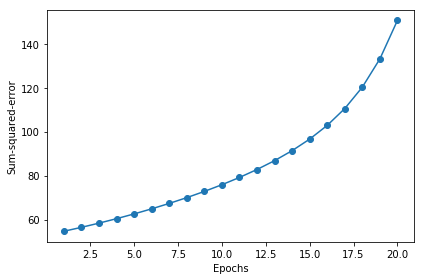

Misclassified samples: 83
Accuracy: 0.17


NameError: name 'plot_decision_regions' is not defined

In [62]:
ada = AdalineGD(n_iter=20, eta=0.01)
ada.fit(X_train_std, y_train)

# cost values

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

# testing accuracy

y_pred = ada.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision boundary 

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=ada, test_idx=range(len(y_train),
                                                    len(y_train) + len(y_test)))
plt.title('Adaline - Gradient Descent')
plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [63]:
df = pd.read_csv('heart.csv')

In [64]:
train = df.drop('target',axis = 1) 
print(train.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, df.target, test_size=0.2,random_state=109) # 70% training and 30% test

In [66]:

from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [67]:

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9016393442622951


In [68]:

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8947368421052632
Recall: 0.9444444444444444
